## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part1-2: Finish the Solution Parse Part of Edit-Distance

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:动态规划算法是为了解决重复最优子问题带来的重复计算问题。

与之前的搜索问题不同之处是，动态规划先找出复杂问题与子问题之间的联系后，求解子问题，组合成答案；搜索方法则是按照一定算法不断递归，一直寻找直到找到结果为止。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:动态规划方法不需要训练数据也可以胜任很多任务。机器学习方法需要训练数据，机器学习训练可能需要大量时间。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:瓷砖如何切割使得盈利最大化问题

银行运钞车行驶路线规划问题

外卖APP送餐员任务分配问题。

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:搜狗拼音纠错

查重系统

语音/机器翻译

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:1.最优子结构性质。如果问题的最优解所包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质（即满足最优化原理）。最优子结构性质为动态规划算法解决问题提供了重要线索。

2.子问题重叠性质。子问题重叠性质是指在用递归算法自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法正是利用了这种子问题的重叠性质，对每一个子问题只计算一次，然后将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。

3.无后效性。即子问题的解一旦确定，就不再改变，不受在这之后、包含它的更大的问题的求解决策影响。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:1.没有统一的标准模型

2.数值方法求解时存在维数灾

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [3]:
import random
import matplotlib.pylab as plt

In [4]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

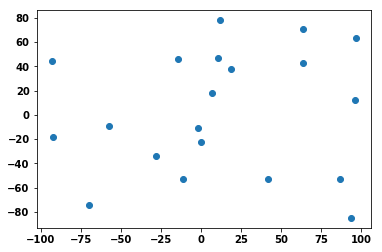

In [5]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [6]:
chosen_p = (5, 10)

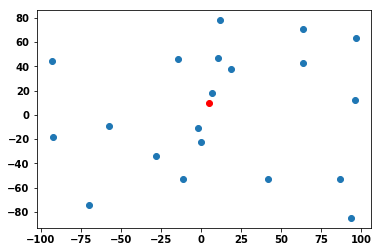

In [7]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

## 问题分析：
从初始点出发，经过k个点，必须经过且只能经过一次，回到出发点，所经过的路程最短。k+1个点构成的是无向完全图

#### 分析：动态规划--分治思想--大化小
>分析子问题的重复性：

>distance = {} 

>当前到达定点current_point，经过点集合path_points_set所有顶点一次的最短路程
{current_point,path_points_set}

>情形1:  $path\_points\_set$仅包含起点：即$distance\{s,\{s\}\} = 0$

> 其他情形：对其他子问题求解，$i$为当前节点，$distance\{k,path\_points\_set\_1\}$从第k个节点起，经过$path\_points\_set\_1$集合中所有的点，到达终点的最短路径长度
$$distance\{i,path\_points\_set+\{i\}\}= min\{distance\{k,path\_points\_set\_1\} + C_{ki}\}$$

In [8]:
chosen_p = (5, 10)

In [9]:
all_point = {(i,j) for i,j in zip(latitudes,longitude)}

In [11]:
all_point

{(-94, 64),
 (-83, -62),
 (-77, 80),
 (-69, -74),
 (-63, -50),
 (-28, -38),
 (-27, -63),
 (-20, -48),
 (-16, -72),
 (-13, -23),
 (-5, -77),
 (3, 3),
 (15, -61),
 (24, -17),
 (32, 85),
 (34, -88),
 (38, 73),
 (40, 13),
 (62, -6),
 (80, 100)}

In [10]:
from collections import defaultdict
tsp_solution = {}

In [11]:
import math

In [12]:
def get_distance(x,y):
    return math.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

In [14]:
get_distance(chosen_p,(-83, -62))

113.70136322841516

In [15]:
sum = 0
a = list(all_point)
for i,v in enumerate(a[:-1]):
    sum+= get_distance(v,a[i+1])
print(sum)
sum += get_distance(chosen_p,a[0])
print(sum)

1972.3953100096874
2045.4569278401186


In [17]:
get_distance(chosen_p,(-69, -74))+get_distance((-28, -38),(-27, -63))

136.96640775964585

In [18]:
def TSP(p,point_set):
    if p in point_set and len(point_set) ==1: return 0
    if len(point_set) == 0: return 0

    min_dis, point = min(
        [(get_distance(p,k)+TSP(k,point_set-{k}),k) for k in point_set], key=lambda x: x[0]
    )
    
    tsp_solution[(point,tuple(list(point_set)))] = min_dis
    
    return min_dis

In [ ]:
TSP(chosen_p,all_point)

In [ ]:
tsp_solution